<a href="https://colab.research.google.com/github/DivHazem/GSGProject/blob/main/HazemGSGProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/Real estate.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
train_dataset = dataset.sample(frac=0.7,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

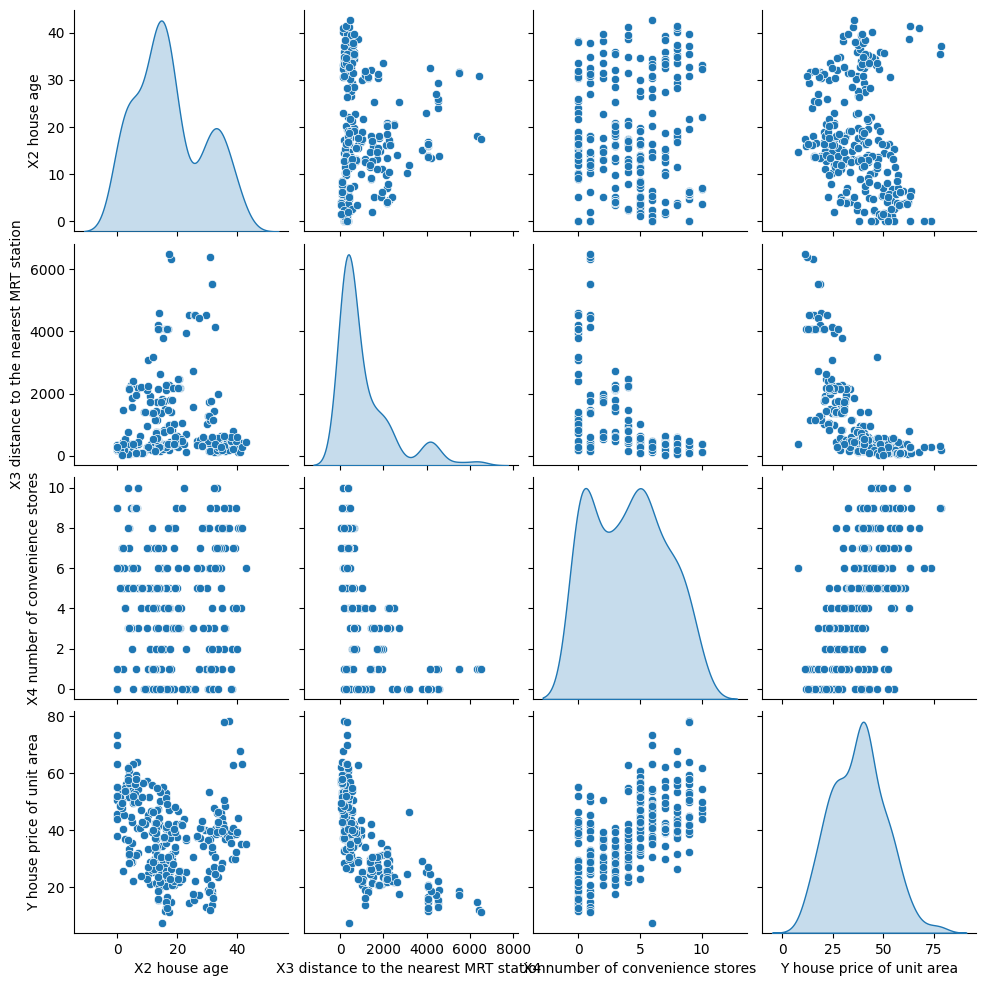

In [ ]:
sns.pairplot(train_dataset[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "Y house price of unit area"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
No,290.0,207.175862,119.649980,2.00000,107.25000,213.500000,308.750000,414.00000
X1 transaction date,290.0,2013.146852,0.279016,2012.66700,2012.91700,2013.167000,2013.417000,2013.58300
X2 house age,290.0,17.398621,11.383236,0.00000,9.02500,15.750000,26.975000,42.70000
X3 distance to the nearest MRT station,290.0,1108.338115,1306.053956,23.38284,289.32480,492.231300,1446.936250,6488.02100
X4 number of convenience stores,290.0,4.079310,2.968797,0.00000,1.00000,4.000000,6.000000,10.00000
X5 latitude,290.0,24.968629,0.012262,24.93363,24.96299,24.970235,24.977387,25.01459
X6 longitude,290.0,121.533101,0.015857,121.47353,121.52760,121.538990,121.543432,121.56627
Y house price of unit area,290.0,37.563103,13.276344,7.60000,27.30000,38.250000,46.075000,78.30000


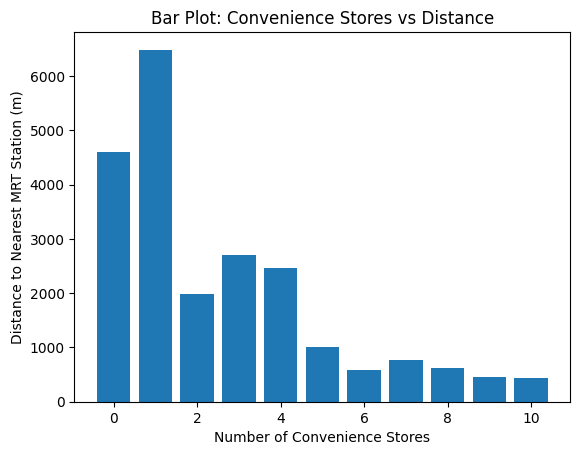

In [ ]:
x = dataset['X4 number of convenience stores']
y = dataset['X3 distance to the nearest MRT station']

plt.xlabel('Number of Convenience Stores')
plt.ylabel('Distance to Nearest MRT Station (m)')
plt.title('Bar Plot: Convenience Stores vs Distance')

plt.bar(x, y)
plt.show()


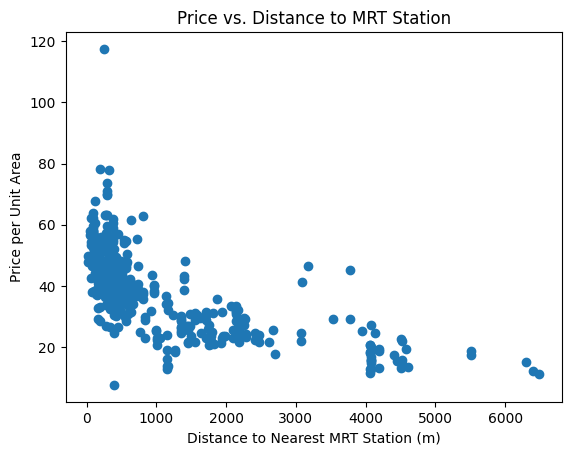

In [ ]:
plt.scatter(dataset["X3 distance to the nearest MRT station"], dataset["Y house price of unit area"])
plt.xlabel("Distance to Nearest MRT Station (m)")
plt.ylabel("Price per Unit Area")
plt.title("Price vs. Distance to MRT Station")
plt.show()

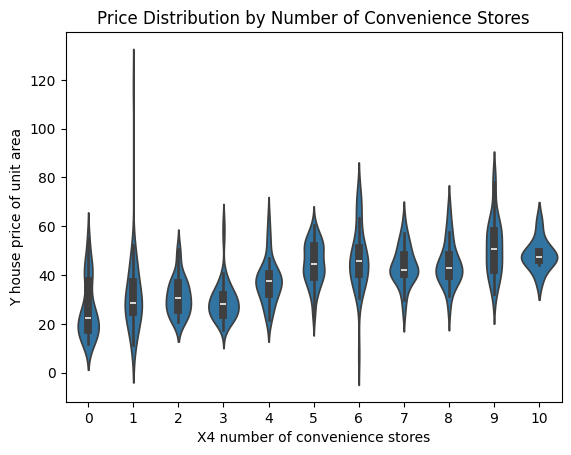

In [ ]:
sns.violinplot(x="X4 number of convenience stores", y="Y house price of unit area", data=dataset)
plt.title("Price Distribution by Number of Convenience Stores")
plt.show()

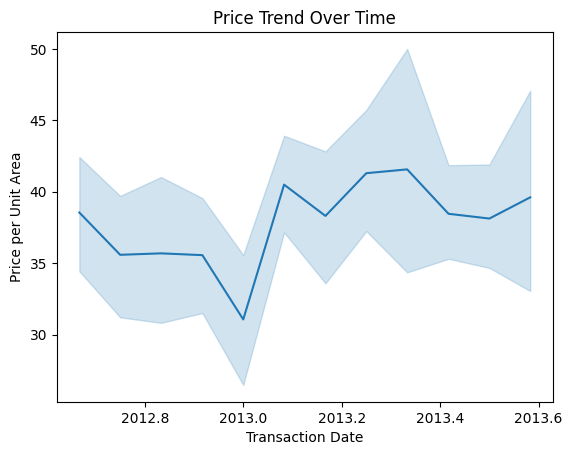

In [ ]:
sns.lineplot(x="X1 transaction date", y="Y house price of unit area", data=dataset)
plt.title("Price Trend Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Price per Unit Area")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the input and output variables
X = dataset[["X2 house age", "X3 distance to the nearest MRT station"]]
y = dataset["Y house price of unit area"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 71.20551591407651
R-squared: 0.5755506416768443


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the input and output variables
X = dataset[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores"]]
y = dataset["Y house price of unit area"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 54.35606746987952
R-squared: 0.6759886132079893
